## Spatial Smartwatch Exploratory Data Analysis

In [13]:
library(reshape)
library(ggplot2)
library(ggpubr)

In [14]:
list.files()

[1] "Animation Fixed.ipynb"               
 [2] "animation.gif"                       
 [3] "first_100.csv"                       
 [4] "NSF-research data"                   
 [5] "p01_A1.txt"                          
 [6] "p01_A1_2018_10_31_07_01_05.csv"      
 [7] "p01_A1_2018_10_31_07_01_05.xlsx"     
 [8] "p01_A1_2018_10_31_07_01_05_fixed.csv"
 [9] "Smartphone animation.ipynb"          
[10] "Smartphone Time Series.ipynb"        
[11] "Text.docx"

<font size=4>
Note: This dataset is a baseline with no driver distraction
    
* Watch spatial contains the x, y, and z data that we are responsible for classifying   
* Car spatial contains data from the car in which the passenger is traveling in
</font>

In [15]:
car_spatial <- read.csv("p01_A1_2018_10_31_07_01_05_fixed.csv")
watch_spatial <- read.csv("p01_A1_2018_10_31_07_01_05.csv")

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"embedded nul(s) found in input"

In [16]:
#No sci notation
options(scipen =0)
head(watch_spatial)

X3790120954139,X0.0048844446,X.0.008547778,X0.025643334
3.790130e+12,0.000000000,-0.006105556,0.02442222
3.790141e+12,0.000000000,-0.010990000,0.02075889
3.790151e+12,0.000000000,-0.013432222,0.02075889
3.790161e+12,-0.004884445,-0.013432222,0.02075889
3.790173e+12,0.002442222,-0.010990000,0.01465333
3.790180e+12,0.020758890,-0.010990000,0.01831667


In [17]:
names(watch_spatial) <- c("ID", "x", "y", "z")
head(car_spatial)

Time.s.,Distance.m.,RawTrkPosToMiddle.m.,LanePos.m.,LaneIndex.1or0.,SteerCommand,SteerDriverInput.Raw.,ThrottleCommand,ThrottleDriverInput.0.1.,BrakeCommand,...,LateralWindForce.N..BlowToLeft..BlowToRight..,VehAheadSameLane.1000m.True.1OrFalse.0.,HeadwayDist.m.,HeadwayTime.s.,TimeToCollision.s.,EntityVelocity.m.s.,EntityAccel.m.ss.,EntityAccelPadel.0.1.,EntityBrakePadel.0.1.,IsBraking
-0.98,-45,-1.37491,0.875088,0,0,0,0.00000000,-1.53e-05,0.00846264,...,0,1,15.36,1.#INF,1.#INF,0,0,0.2,0,0
-0.96,-45,-1.37491,0.875088,0,0,0,0.00846264,-1.53e-05,0.00000000,...,0,1,15.36,1.#INF,1.#INF,0,0,0.2,0,0
-0.94,-45,-1.37491,0.875088,0,0,0,0.00846264,-1.53e-05,0.00000000,...,0,1,15.36,1.#INF,1.#INF,0,0,0.2,0,0
-0.92,-45,-1.37491,0.875088,0,0,0,0.00846264,-1.53e-05,0.00000000,...,0,1,15.36,1.#INF,1.#INF,0,0,0.2,0,0
-0.90,-45,-1.37491,0.875088,0,0,0,0.00846264,-1.53e-05,0.00000000,...,0,1,15.36,1.#INF,1.#INF,0,0,0.2,0,0
-0.88,-45,-1.37491,0.875088,0,0,0,0.00846264,-1.53e-05,0.00000000,...,0,1,15.36,1.#INF,1.#INF,0,0,0.2,0,0


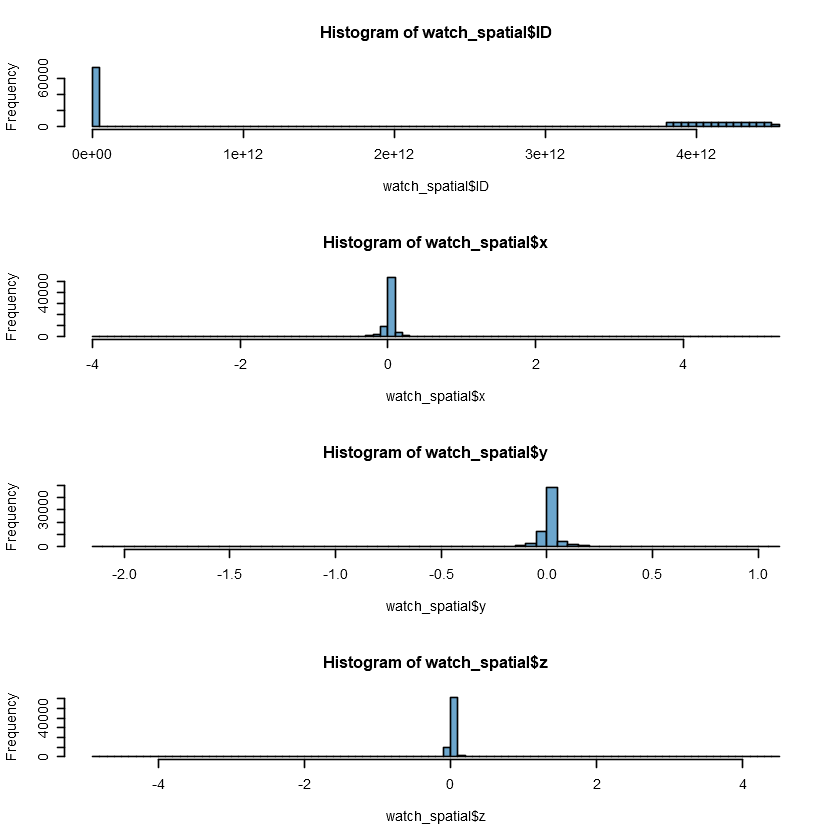

In [18]:
par(mfrow = c(4,1))
hist(watch_spatial$ID, col = 'skyblue3', breaks = 100)
hist(watch_spatial$x, col = 'skyblue3', breaks = 100)
hist(watch_spatial$y, col = 'skyblue3', breaks = 100)
hist(watch_spatial$z, col = 'skyblue3', breaks = 100)

<font size=4>
It looks like there are Data points where IDs = 0, let's remove them in analysis for now
</font>

In [28]:
#count rows
#Code number of 0 values
print("Total number of rows")
nrow(watch_spatial)
watch_spatial$ID_zero <- watch_spatial$ID == 0
watch_spatial$ID_diff <- watch_spatial$ID < 3*10^12

#Total number of 0 values
print("Total number of rows with ID = 0")
sum(watch_spatial$ID_zero)
print("Total number of rows with ID < 3e+12")
sum(watch_spatial$ID_diff)

#% 0
print("% that ID = 0")
sum(watch_spatial$ID_zero)/nrow(watch_spatial)
print("% ID < 3e+12")
sum(watch_spatial$ID_diff)/nrow(watch_spatial)

#Remove 0s
watch_spatial_1 <- subset(watch_spatial, ID_zero == 0)
watch_spatial_2 <- subset(watch_spatial_1, ID_diff == 0)

#Removed diff values
summary(watch_spatial_2$ID)

[1] "Total number of rows"


[1] 147582

[1] "Total number of rows with ID = 0"


[1] 213

[1] "Total number of rows with ID < 3e+12"


[1] 73226

[1] "% that ID = 0"


[1] 0.001443265

[1] "% ID < 3e+12"


[1] 0.4961716

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
3.790e+12 3.975e+12 4.159e+12 4.159e+12 4.344e+12 4.528e+12 

[1] "x"
[1] "y"
[1] "z"


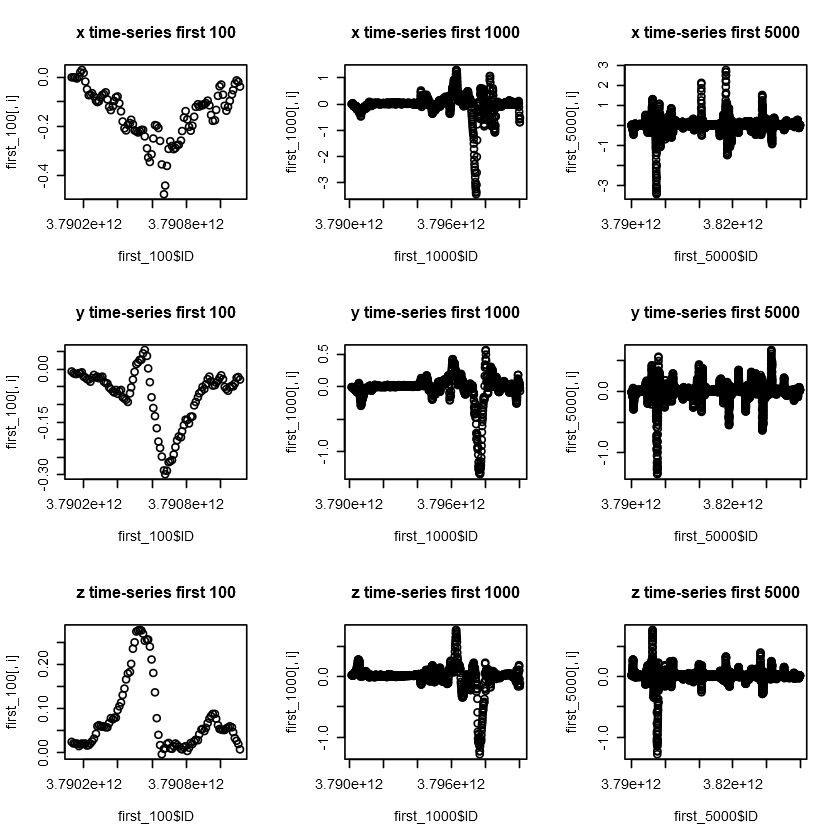

In [20]:
#Plot time series

first_100 <- head(watch_spatial_2, n = 100)
first_1000 <- head(watch_spatial_2, n = 1000)
first_5000 <- head(watch_spatial_2, n = 5000)



par(mfrow = c(3,3))
colnames <- c("x", "y", "z")

for(i in colnames)
{
    print(i)
    plot(first_100$ID, first_100[,i]) + title(paste0(i, " time-series first 100"))
    plot(first_1000$ID, first_1000[,i]) + title(paste0(i, " time-series first 1000"))
    plot(first_5000$ID, first_5000[,i]) + title(paste0(i, " time-series first 5000"))  
    }

In [21]:
melt_100 <- melt(first_100, id.vars = "ID", measure.vars = c("x", "y", "z"))
melt_1000 <- melt(first_1000, id.vars = "ID", measure.vars = c("x", "y", "z"))
melt_5000 <- melt(first_5000, id.vars = "ID", measure.vars = c("x", "y", "z"))
head(melt_5000)

ID,variable,value
3.790130e+12,x,0.000000000
3.790141e+12,x,0.000000000
3.790151e+12,x,0.000000000
3.790161e+12,x,-0.004884445
3.790173e+12,x,0.002442222
3.790180e+12,x,0.020758890


In [22]:
melt_all <- melt(watch_spatial_2, id.vars = "ID", measure.vars = c("x", "y", "z"))

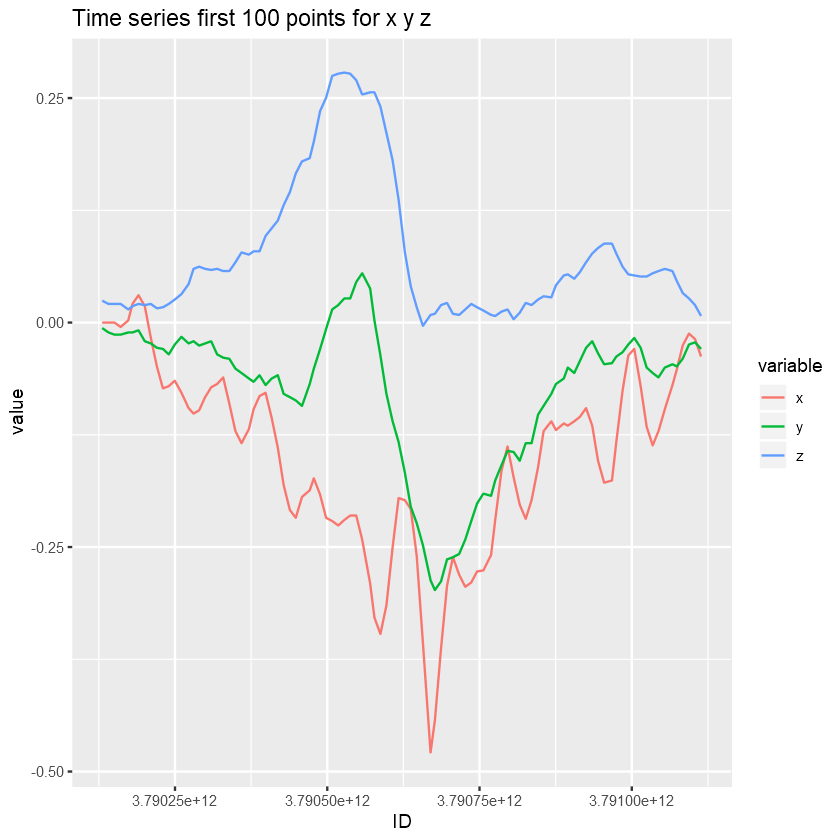

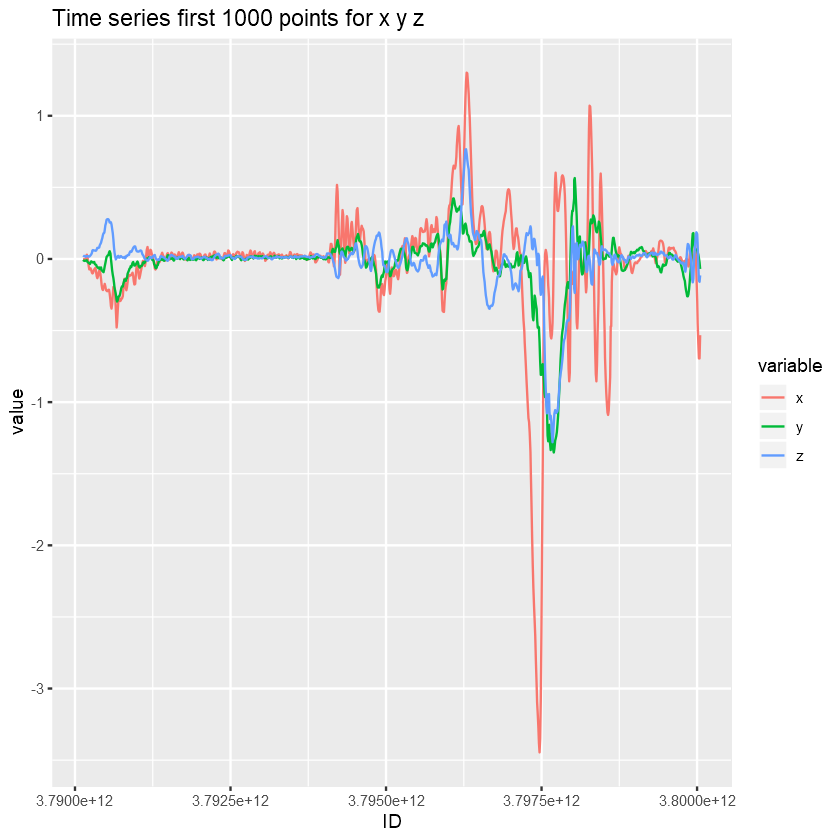

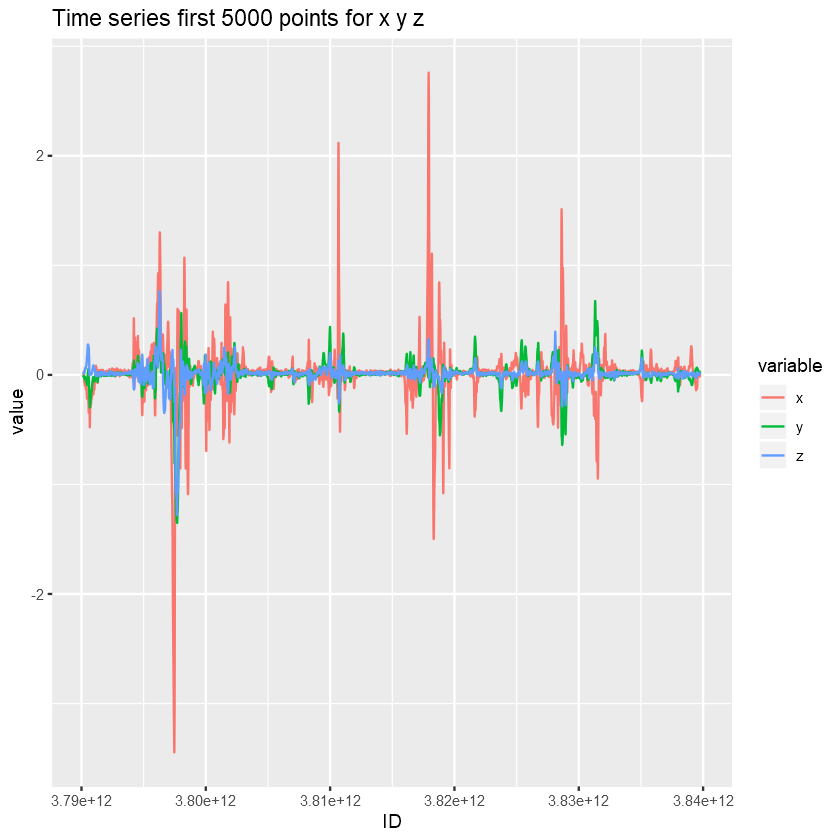

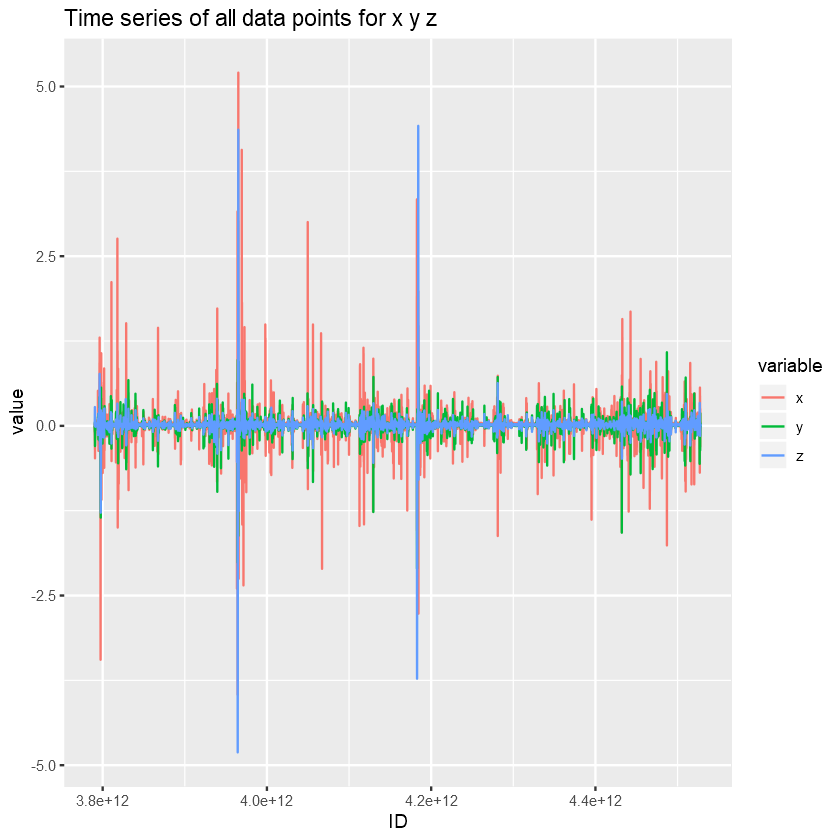

In [29]:
ggplot(melt_100, aes(y=value, x=ID, color = variable)) + geom_line() + ggtitle("Time series first 100 points for x y z")
ggplot(melt_1000, aes(y=value, x=ID, color = variable)) + geom_line() + ggtitle("Time series first 1000 points for x y z")
ggplot(melt_5000, aes(y=value, x=ID, color = variable)) + geom_line() + ggtitle("Time series first 5000 points for x y z")
ggplot(melt_all, aes(y=value, x=ID, color = variable)) + geom_line() + ggtitle("Time series of all data points for x y z")

<font size=4>
Lets see if we can animate the hand movements for the first 100 points!
</font>

In [43]:
#2d Animation of Hand Movements
library(gganimate)

pxy <- ggplot(
  first_100, 
  aes(x=x, y=y)
  ) +
  geom_point(show.legend = FALSE, alpha = 0.7, colour = "red", size = 4) +
  scale_color_viridis_d() +
  xlim(-0.5, 0.5) +
  labs(x = "x location", y = "y location") 


pxy <- pxy + transition_time(ID) + 
  labs(title = "x y location for ID: {frame_time}") + shadow_wake(wake_length = 1, alpha = FALSE)

pxy

In [42]:
pxz <- ggplot(
  first_100, 
  aes(x=x, y=z)
  ) +
  geom_point(show.legend = FALSE, alpha = 0.7, colour = "blue", size = 4) +
  scale_color_viridis_d() +
  xlim(-0.5, 0.5) +
  labs(x = "x location", y = "z location")

pxz <- pxz + transition_time(ID) + 
  labs(title = "x z location for ID: {frame_time}") +  shadow_wake(wake_length = 1, alpha = FALSE)

pxz

<font size=4>
To do:

* Chunk standard deviation for discrete time events, what windows do we use
* Timestamps for distraction events to train for response
* Event definitions for 
    

    
</font>